# Open SIMS files

Import the .im file:

In [74]:
# can take up to 40 seconds to load these
import sims
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure



Load the data using `sims.SIMS()` function.

In [75]:
s = sims.SIMS('data/nanoSIMS/example_im/Thy_50_12_r4_r.im')


Align the data using `sims.utils.align()` function.

In [76]:
aligned_data, shifts = sims.utils.align(s)
aligned_data

<xarray.DataArray (species: 3, frame: 1, y: 512, x: 512)>
array([[[[  20,   30,   33, ...,  331,  351,   19],
         [  14,   24,   19, ...,  251,  249,   16],
         [  17,   16,   13, ...,  185,  207,   13],
         ...,
         [   8,    7,    9, ...,   11,    3,   11],
         [  16,    8,    3, ...,    8,    6,   10],
         [ 336,  263,  261, ...,  429,  402,  101]]],


       [[[   0,    0,    0, ...,   26,   14,    0],
         [   0,    0,    0, ...,   15,   12,    0],
         [   0,    0,    0, ...,   19,   16,    0],
         ...,
         [   0,    0,    0, ...,    0,    0,    1],
         [   1,    0,    0, ...,    0,    0,    0],
         [   0,    0,    1, ...,   14,   11,    0]]],


       [[[ 708,  651,  645, ..., 1524, 1542,  651],
         [ 594,  591,  609, ..., 1453, 1493,  658],
         [ 600,  611,  636, ..., 1437, 1474,  675],
         ...,
         [ 557,  540,  546, ...,  488,  461,  594],
         [ 540,  529,  527, ...,  457,  437,  575],
         [1495, 1307, 1272, ..., 1761, 1747, 1017]]]], dtype=uint32)
Coordinates:
  * species  (species) <U2 '1H' '2H' 'SE'
Dimensions without coordinates: frame, y, x
Attributes:
    unit:     counts

Next, we pull a single ion "layer" out of the data and convert it to a numpy array for handling.

In [77]:
aligned_1H = aligned_data.loc['1H'].to_numpy()
aligned_1H
np.shape(aligned_1H)

(1, 512, 512)

Now we want to remove the outer 20 pixels, which suffer from edge effects.

In [78]:
crop_margin = 20 # define the cropping dimensions
trimmed_1H = aligned_1H[:, crop_margin:-crop_margin, crop_margin:-crop_margin].squeeze()
trimmed_1H

np.shape(trimmed_1H)

(472, 472)

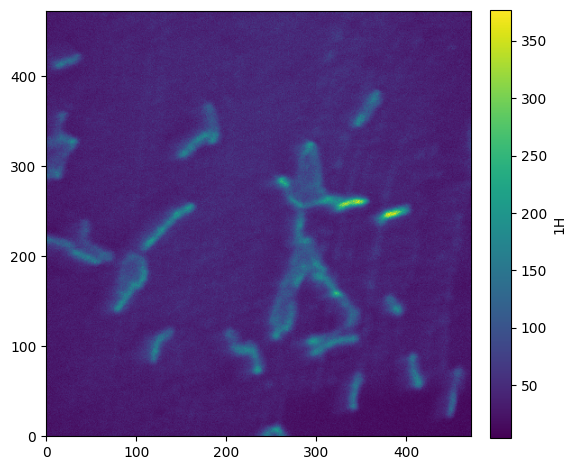

In [79]:
fig1, ax1 = plt.subplots(figsize = (6,6))
plt.imshow(trimmed_1H)
im1 = ax1.imshow(trimmed_1H, cmap = 'viridis')
cbar1 = plt.colorbar(im1, ax=ax1, fraction = 0.046, pad = 0.04, label = "1H")
plt.axis([0, 472, 0, 472])
plt.plot()
plt.savefig("fig_output/Thy_50_12_1H.png", dpi = 300)
plt.show()


And we'll do the exact same thing for 2H data:

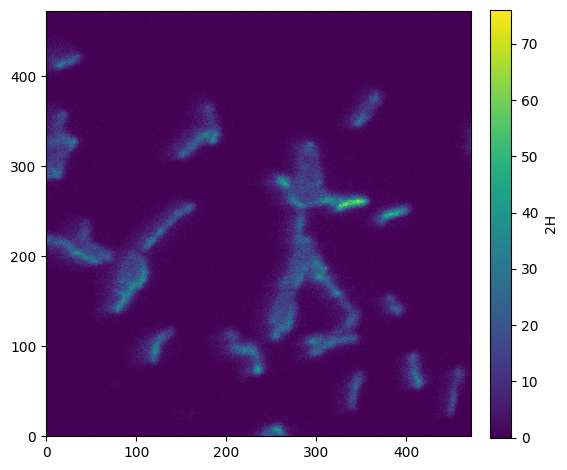

In [80]:
# Plot 1: 2H
aligned_2H = aligned_data.loc['2H'].to_numpy()
trimmed_2H = aligned_2H[:, crop_margin:-crop_margin, crop_margin:-crop_margin].squeeze()

fig0, ax0 = plt.subplots(figsize = (6,6))
plt.imshow(trimmed_2H)
im0 = ax0.imshow(trimmed_2H, cmap = 'viridis')
cbar1 = plt.colorbar(im0, ax=ax0, fraction = 0.046, pad = 0.04, label = "2H")
plt.axis([0, 472, 0, 472])
plt.plot()
plt.savefig("fig_output/Thy_50_12_2H.png", dpi = 300)
plt.show()

Calculate fractional abundance as 2F = 2H / (1H + 2H) * 100 %

In [81]:
abundance_at2H50 = (trimmed_2H / (trimmed_2H + trimmed_1H)) * 100

abundance_at2H50

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 3.22580645, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.7027027 ],
       [0.        , 3.57142857, 0.        , ..., 0.        , 0.        ,
        0.        ]])

Now we plot the 2F:

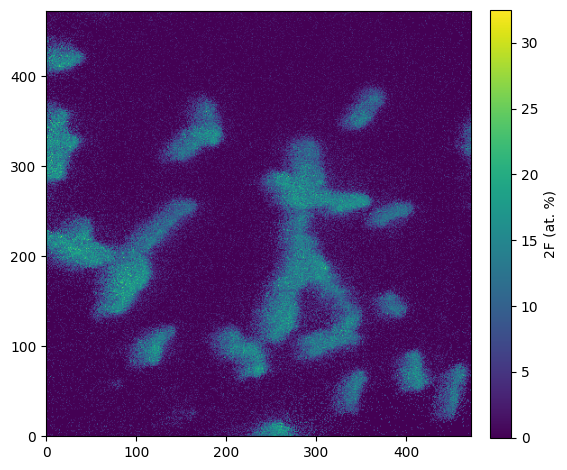

In [82]:
# Plot 1: 2F

fig2, ax2 = plt.subplots(figsize = (6,6))
im2 = ax2.imshow(abundance_at2H50, cmap = 'viridis')
cbar2 = plt.colorbar(im2, ax=ax2, fraction = 0.046, pad = 0.04, label = "2F (at. %)")
plt.axis([0, 472, 0, 472])
plt.plot()
plt.savefig("fig_output/Thy_50_12_2F.png", dpi = 300)
plt.show()



# Open the other SIMS file

In [83]:
s2 = sims.SIMS('data/nanoSIMS/example_im/Thy_00_07_1.im')

aligned_data2, shifts = sims.utils.align(s2)

aligned_2H_2 = aligned_data2.loc['2H'].to_numpy()

trimmed_2H_2 = aligned_2H_2[1, crop_margin:-crop_margin, crop_margin:-crop_margin].squeeze()


/Users/tacaro/miniconda3/lib/python3.10/site-packages/sims/utils.py:396: FutureWarning: In scikit-image 0.22, phase_cross_correlation will start returning a tuple or 3 items (shift, error, phasediff) always. To enable the new return behavior and silence this warning, use return_error='always'.
  sh = phase_cross_correlation(data[reference_frame], frame,


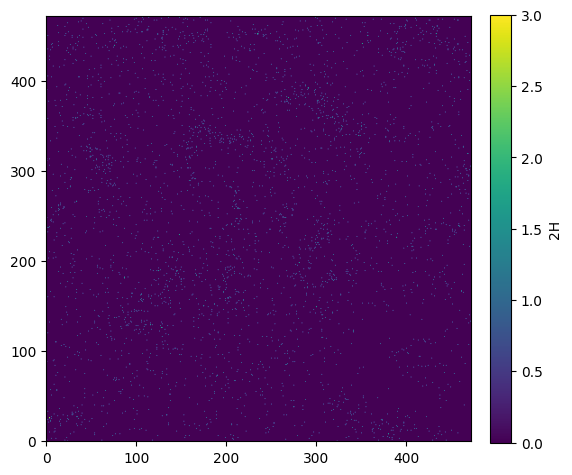

In [84]:
# Plot 2: 2H
fig3, ax3 = plt.subplots(figsize = (6,6))
plt.imshow(trimmed_2H_2)
im3 = ax3.imshow(trimmed_2H_2, cmap = 'viridis')
cbar3 = plt.colorbar(im3, ax=ax3, fraction = 0.046, pad = 0.04, label = "2H")
plt.axis([0, 472, 0, 472])
plt.plot()
plt.savefig("fig_output/Thy_00_07_2H.png", dpi = 300)
plt.show()

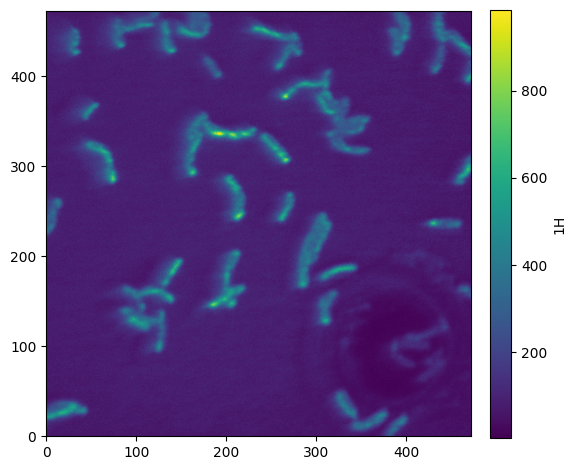

In [85]:
# Plot 2: 1H
aligned_1H_2 = aligned_data2.loc['1H'].to_numpy()

trimmed_1H_2 = aligned_1H_2[1, crop_margin:-crop_margin, crop_margin:-crop_margin].squeeze()



fig4, ax4 = plt.subplots(figsize = (6,6))
plt.imshow(trimmed_1H_2)
im4 = ax4.imshow(trimmed_1H_2, cmap = 'viridis')
cbar3 = plt.colorbar(im4, ax=ax4, fraction = 0.046, pad = 0.04, label = "1H")
plt.axis([0, 472, 0, 472])
plt.plot()
plt.savefig("fig_output/Thy_00_07_1H.png", dpi = 300)
plt.show()

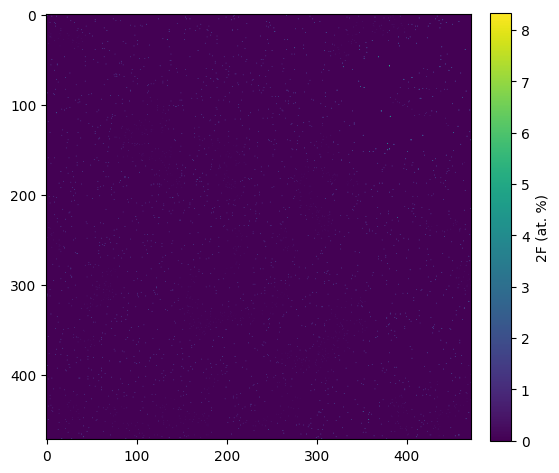

In [86]:
# Plot 2: 2F

abundance_at2H50_2 = (trimmed_2H_2 / (trimmed_2H_2 + trimmed_1H_2)) * 100

abundance_at2H50_2

fig5, ax5 = plt.subplots(figsize = (6,6))
im5 = ax5.imshow(abundance_at2H50_2, cmap = 'viridis')
cbar2 = plt.colorbar(im5, ax=ax5, fraction = 0.046, pad = 0.04, label = "2F (at. %)")
plt.plot()
plt.savefig("fig_output/Thy_00_07_2F.png", dpi = 300)
plt.show()

